## Variable selection 7: SHAP values

This notebook goes with the blog post: Variable selection in Python, part II.

### Preliminaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.linear_model import LinearRegression

In [2]:
font = {'size'   : 22}
plt.rc('font', **font)

### Data loading

In [3]:
data = pd.read_csv('../data/Table2_Hunt_2013_edit.csv').astype('float64')

In [4]:
data = data.loc[:, ['Production', 'Position', 'Gross pay', 'Phi-h', 'Pressure', 'Random 1', 'Random 2', 'Gross pay transform']]
data.head()

,Production,Position,Gross pay,Phi-h,Pressure,Random 1,Random 2,Gross pay transform
0,15.10,2.1,0.1,0.5,19.0,5.0,379.0,3.54
1,21.30,1.1,1.0,4.0,16.0,13.0,269.0,5.79
2,22.75,1.0,1.9,19.0,14.0,12.0,245.0,8.51
3,15.72,2.1,3.1,21.7,17.0,6.0,273.0,11.52
4,7.71,2.9,4.1,24.6,11.0,10.0,237.0,10.16


### SHAP values with linear regression (with and without asumption of correlated features)

In [5]:
X, y = data.drop('Production',axis=1), data['Production']

In [6]:
LR= LinearRegression()
LR.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
explainer_L = shap.LinearExplainer(LR, X, feature_dependence="correlation")
shap_values = explainer_L.shap_values(X)

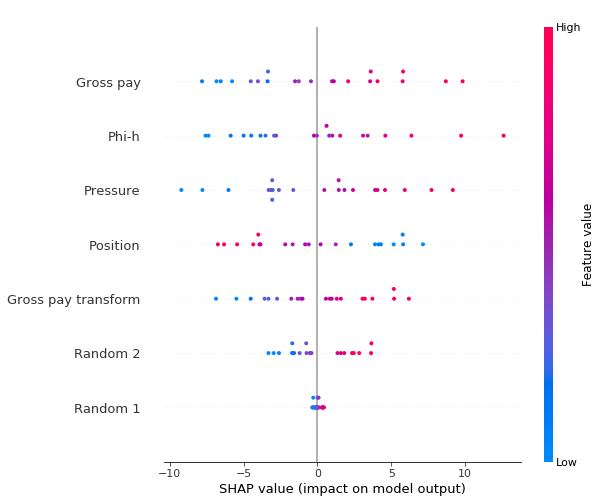

In [8]:
shap.summary_plot(shap_values, X, show=False)
fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.show();

In [9]:
explainer_L = shap.LinearExplainer(LR, X, feature_dependence="independent")
shap_values = explainer_L.shap_values(X)

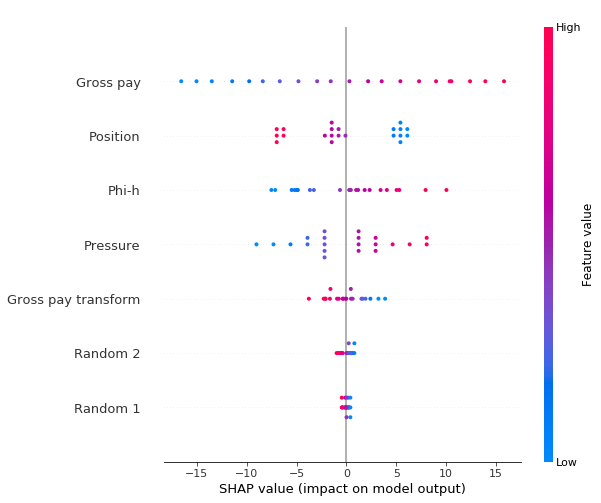

In [10]:
shap.summary_plot(shap_values, X, show=False)
fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.show();